# Finding Donors for CharityML
Udacity Intro to Machine Learning with PyTorch Nanodegree Project 1

## Table of Contents
- [1. Introduction](#1.)
    - [1.1 Project Motivation](#1.1)
    - [1.2 The Dataset](#1.2)
    - [1.3 Specifying Python and Main Libraries Versions](#1.3)
- [2. Exploring the Data](#2.)
- [3. Preparing the Data](#3.)
    - [3.1 Transforming Skewed Continuous Features](#3.1)
    - [3.2 Normalizing Numerical Features](#3.2)
    - [3.3 Data Preprocessing](#3.3)
    - [3.4 Shuffling and Splitting Data](#3.4)
- [4. Evaluating Model Performance](#4.)
    - [4.1 Model Evaluation Metrics](#4.1)
    - [4.2 Naive Predictor Performace](#4.2)
    - [4.3 Supervised Learning Models Performance](#4.3)
- [5. Improving Results](#5.)
    - [5.1 Choosing the Best Model](#5.1)
    - [5.2 Describing AdaBoostClassifier in Layman's Terms](#5.2)
    - [5.3 Model Tuning](#5.3)
    - [5.4 Final Model Evaluation](#5.4)
- [6. Feature Importance](#6.)
    - [6.1 Feature Relevance Observation](#6.1)
    - [6.2 Extracting Most Predictive Features](#6.2)
    - [6.3 Feature Selection](#6.3)


---
<a id='1.'></a>
## 1. Introduction 

<a id='1.1'></a>
### 1.1 Project Motivation
CharityML is a fictitious charity organization located in the heart of Silicon Valley that was established to provide financial support for people eager to learn machine learning. To expand their potential donor base, CharityML has decided to send letters to residents of California, but to only those most likely to donate to the charity. After nearly 32,000 letters were sent to people in the community, CharityML determined that every donation they received came from someone that was making more than $50,000 annually. With nearly 15 million working Californians, CharityML wants to build an algorithm to best identify potential donors and reduce the overhead cost of sending mail. The goal of this project is to evaluate and optimize several different supervised learning algorithms to determine which algorithm will provide the highest donation yield while also reducing the total number of letters being sent due to marketing budget constraints.


In this project, several supervised learning algorithms (Random Forest, AdaBoost and Support Vector Machines (SVM)) are employed to accurately model individuals' income using the data collected from the 1994 U.S. Census. Then, the best candidate algorithm is chosen from preliminary results and further optimized to best model the data. The goal of this implementation is to construct a model that accurately predicts whether an individual makes more than \$50,000. In the real world, this sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request or whether or not they should reach out, to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, it is possible to infer this value from other publically available features. 

<a id='1.2'></a>
### 1.2 The Dataset
The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). This dataset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. The article by Ron Kohavi can be found [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data investigated here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

<a id='1.3'></a>
### 1.3 Specifying Python and Main Libraries Versions

In [1]:
# Specify Python version used for this project
from platform import python_version
print("Python version: {}". format(python_version()))

# Load main libraries needed for the project 
import numpy as np
import pandas as pd
import matplotlib
import sklearn

# Specify the version of each library used in this project
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))
print("scikit-learn version: {}". format(sklearn.__version__))

Python version: 3.8.8
NumPy version: 1.20.2
pandas version: 1.2.4
matplotlib version: 3.3.4
scikit-learn version: 0.24.2


In [2]:
# Additional imports required for this project
from time import time
from IPython.display import display
import visuals as vs # visuals.py file
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

----
<a id='2.'></a>
## 2. Exploring the Data

In [3]:
# Load the Census dataset
data = pd.read_csv("census.csv")

# Display the first five records
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
data.shape

(45222, 14)

The last column from this dataset, `'income'`, will be the target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

A cursory investigation of the dataset will determine how many individuals fit into either group, and will allow to determine the percentage of these individuals making more than \$50,000. The following variables are calculated:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

In [5]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = len(np.argwhere(data.income.values == ">50K"))

# Number of records where individual's income is at most $50,000
n_at_most_50k = len(np.argwhere(data.income.values == "<=50K"))

# Percentage of individuals whose income is more than $50,000
greater_percent = round((n_greater_50k/n_records)*100, 2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** **Featureset Exploration** **

* **age**: Age (continuous) 
* **workclass**:  Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked) 
* **education**:  Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool) 
* **education-num**: Number of educational years completed (continuous) 
* **marital-status**: Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse) 
* **occupation**: Work Occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces) 
* **relationship**: Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried) 
* **race**: Race (Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other) 
* **sex**: Sex (Female, Male) 
* **capital-gain**: Monetary Capital Gains (continuous) 
* **capital-loss**: Monetary Capital Losses (continuous) 
* **hours-per-week**: Average Hours Per Week Worked (continuous) 
* **native-country**: Native Country (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

** **Target Variable** **
- **income**: Income Class (string: <=50K, >50K)

----
<a id='3.'></a>
## 3. Preparing the Data
Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and restructured — this is typically known as preprocessing. Fortunately, for this dataset, there are no invalid or missing entries to deal with; however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

<a id='3.1'></a>
### 3.1 Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset, two features fit this description: `capital-gain` and `capital-loss` columns. 

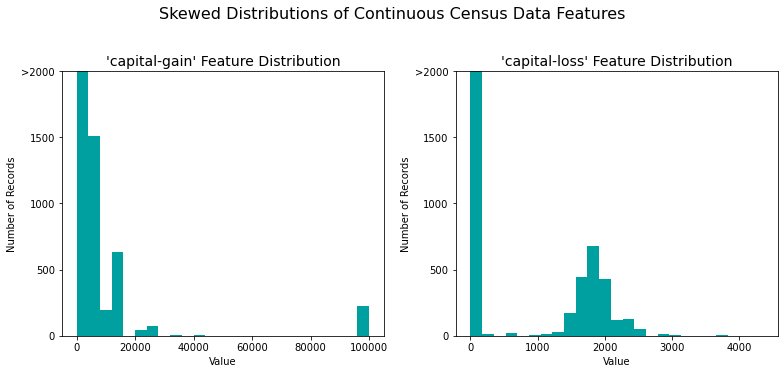

In [6]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `capital-gain` and `capital-loss`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. However, care must be taken when applying this transformation: The logarithm of `0` is undefined, so the values must be translated by a small amount above `0` to apply the logarithm successfully.

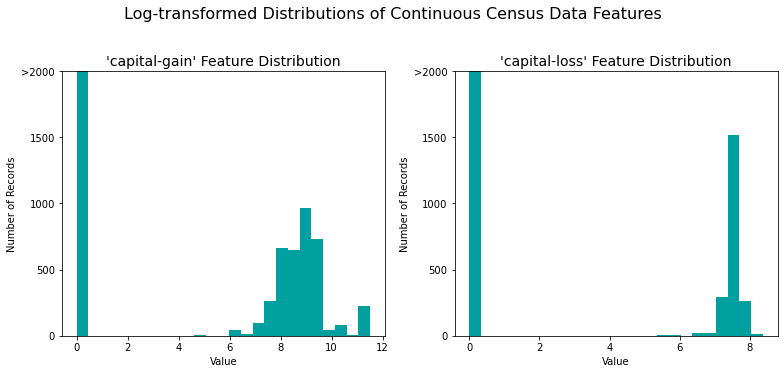

In [7]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

<a id='3.2'></a>
### 3.2 Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `capital-gain` or `capital-loss` above); however, normalization ensures that each feature is treated equally when applying supervised learners. The [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) will be used for this procedure.

**Note:** once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of the first five records with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


<a id='3.3'></a>
### 3.3 Data Preprocessing

From the table in section 2 above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect the input to be numeric, which requires non-numeric features to be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. This feature is then encoded into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, the non-numeric target label `income` should be converted to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), it is possible to avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively.

In [9]:
# One-hot encoding the features
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the income data to numerical values
income = income_raw.apply(lambda income: 0 if income == "<=50K" else 1)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

<a id='3.4'></a>
### 3.4 Shuffling and Splitting Data
Since all categorical variables have been converted into numerical features, and all numerical features have been normalized, the data (both features and their labels) can finally be split into training and test sets. 80% of the data will be used for training and 20% for testing.

In [10]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
<a id='4.'></a>
## 4. Evaluating Model Performance
In this section, four different algorithms are investigated to determine which is best at modelling the data. The chosen algorithms from the `scikit-learn` library are **Random Forest**, **AdaBoost** and **Support Vector Machines (SVM)**, while the fourth algorithm is known as a **Naive Predictor**.

<a id='4.1'></a>
### 4.1 Model Evaluation Metrics
#### 4.1.1 Common evaluation metrics

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points). The formula for accuracy is shown below:

`[(True Positives + True Negatives) / (True Positives + False Positives + True Negatives + False Negatives)]`

**Precision** measures the proportion of messages that were classified as spam, actually were spam.
It is a ratio of true positives (words classified as spam, and which are actually spam) to all positives (all words classified as spam, irrespective of whether that was the correct classification). The formula for precision is shown below:

`[True Positives/(True Positives + False Positives)]`

**Recall (sensitivity)** measures the proportion of messages that actually were spam were classified as spam.
It is a ratio of true positives (words classified as spam, and which are actually spam) to all the words that were actually spam. The formula for recall is shown below:

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions, like in this case, accuracy by itself is not a very good metric. For instance, if we had 100 text messages and only 2 were spam, and the rest 98 weren't, we could classify 90 messages as not spam (including the 2 that were spam, hence classifying them to be false negatives) and 10 as spam (all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is a weighted average (harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

#### 4.1.2 CharityML's  case

*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performance would be appropriate. Additionally, identifying someone that does not make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is more important than the model's ability to recall those individuals. This means that in this case, **precision** would be valued more than the recall metric. Additionally, **F-beta score** could be used as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of entries based on income classes, it's clear that most individuals do not make more than \$50,000. This can greatly affect the **accuracy**, since we could simply state that an individual does not make more than \$50,000 and generally be right, without ever looking at the data! Making such a statement would be called *naive*, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for the data to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

<a id='4.2'></a>
### 4.2 Naive Predictor Performace
The purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally, the base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a good starting place.

The naive predictor model would always predicts that an individual made more than $50,000. When we have a model that always predicts '1' (i.e. the individual makes more than 50k), then our model will have no True Negatives (TN) or False Negatives (FN) as we are not making any negative ('0' value) predictions. Therefore our accuracy, in this case, becomes the same as our precision because every prediction that we have made with the value '1' that should have '0' becomes a False Positive; therefore, our denominator for precision, in this case, is the total number of records we have in total. 

The computation of the naive predictor model's accuracy and F-score is shown below. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.

In [11]:
TP = np.sum(income) # Count the ones as this is the naive case
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall
accuracy = (TP + TN) / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# Calculate F-score using the formula above for beta = 0.5
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


<a id='4.3'></a>
###  4.3 Supervised Learning Models Performance
**The following are some of the studied supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html);
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, Random Forest, AdaBoost, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### 4.3.1 Chosen Models Description 
The following three models were chosen for this project: **Random Forest**, **AdaBoost** and **Support Vector Machines (SVM)**.
### Random Forest
A random forest is a machine learning algorithm that can be used to solve regression and classification problems. It consists of many decision trees and utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.  The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating.

*  *An example of a real-world application of the model in the industry:*

The algorithm can be used for product recommendation in e-commerce websites where sentiment analysis is performed using a random forest approach [(Khanvilkar and Vora, 2019)](https://www.researchgate.net/publication/334130376_Product_Recommendation_using_Sentiment_Analysis_using_Random_Forest_Approach_Gayatri).

* *Strengths of Random Forest:*
<br />

    * Random Forest is a very versatile algorithm as it is applicable to both classification and regression problems
    * Random Forest works well with both categorical and continuous variables
    * Random Forest does not overfit the data while having high accuracy
    * Random Forest automatically handles missing values in the dataset
    * Random Forest has the power to handle large datasets with higher dimensionality


* *Weaknesses of Random Forest:*
<br />

    * Can be considered as a black box as it offers limited interpretability and fails to determine the significance of each variable
    * Due to its complexity, it requires significant computational power and resources
    * Since it combines multiple decision trees, the model has a long training time period
    * Since the algorithm is based on bootstrap sampling, it will have difficulties accurately predicting rare outcomes
    
    
* *What makes this model a good candidate for the problem?*

Random Forest is suitable for this problem as we are dealing with a relatively big dataset that has 45,222 entries and 13 features, and this algorithm works well with large datasets.

### AdaBoost
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on misclassified cases.

*  *An example of a real-world application of the model in the industry:*

The algorithm is heavily utilised for solving real-world problems, such as predicting customer churn which is the propensity of customers to cease doing business with a company in a given time period [(Jinbol, Xiu and Wenhuang, 2007)](https://www.cs.rit.edu/~rlaz/PatternRecognition/slides/churn_adaboost.pdf).

* *Strengths of AdaBoost:*
<br />

    * AdaBoost has a high degree of precision
    * AdaBoost is a fast algorithm that reaches the minimum error very quickly
    * AdaBoost is relatively easy to use as there is less need to tweak parameters to obtain sufficient results
    * Multiple classification algorithms can be used as base weak classifiers as part of the algorithm
    * AdaBoost performs best when boosting weak learners in binary classification problems


* *Weaknesses of AdaBoost:*
<br />

    * AdaBoost is very sensitive to uniform noise in the data and outliers
    * AdaBoost's classification accuracy decreases when the data is imbalanced
    * Training could be time-consuming


* *What makes this model a good candidate for the problem?*

AdaBoost is suitable for this problem as it performs best and with binary classification, which is exactly the nature of CharityML's case where the aim is to predict whether an individual's income falls in the over \$50,000 category or not. 

### Support Vector Machines (SVM)
Support vector machines are a set of supervised learning methods. The objective of the support vector machine algorithm is to find a boundary in N-dimensional space (N — the number of features) that distinctly classifies the data points and for this boundary to be as far away from the points as possible.

*  *An example of a real-world application of the model in the industry:*

There are various applications of support vector machines in medicine. More specifically, they are used for cancer classification, such as classifying MRI images of the brain [(Machhale et al., 2015)](https://ieeexplore.ieee.org/abstract/document/7150592/authors#authors).


* *Strengths of Support Vector Machines:*
<br />

    * SVMs are effective in high dimensional spaces and are still effective when the number of dimensions exceeds the number of samples
    * SVMs are versatile as different Kernel functions can be specified for the decision function, such as polynomial and RBF kernels
    * SVMs work well with unstructured and semi-structured data like text, images and trees
    * SVMs work relatively well when there is a clear margin of separation between classes
    * SVMs are memory efficient as they use a subset of training points in the decision function


* *Weaknesses of Support Vector Machines:*
<br />

    * Choosing an appropriate kernel, in general, for any case, is challenging
    * SVMs do not directly provide probability estimates
    * In cases when the number of features is much greater than the number of samples, kernel choice must be carefully considered due to the possibility of overfitting the data
    * SVMs have long training times for large datasets
 
 
* *What makes this model a good candidate for the problem?*

Support vector machines are suitable to solve this problem as it is a versatile classification algorithm; hence it would perform well with a binary classification problem.

### 4.3.2 Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model, it's important to create a training and predicting pipeline that allows to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. 

A function to speed up the training and prediction is shown below:

In [12]:
# Import metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' 
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set (X_test), then get predictions on the first 300 training samples (X_train)
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy score on the first 300 training samples and the test set
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples and the test set
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5)
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
       
    # Progress check
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### 4.3.3  Initial Model Training
The code below performs initial model training for each of the chosen supervised learning algorithms for the entire dataset, a 10% and 1% samples of the dataset.

In [13]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

# Initialize the three models
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
svm = SVC(random_state=42)

classifiers = [rf, ada, svm]

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# samples_100 is the entire training set
# samples_10 is 10% of the entire training set
# samples_1 is 1% of the entire training set
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in classifiers:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.


----
<a id='5.'></a>
## 5. Improving Results
In this section, the best supervised learning model is chosen, based on the evaluation metrics described above, to be used on the data. Then, a grid search optimization is performed for the chosen model over the entire training set (`X_train` and `y_train`) by tuning the parameters to improve upon the untuned model's F-score. 

<a id='5.1'></a>
### 5.1 Choosing the Best Model

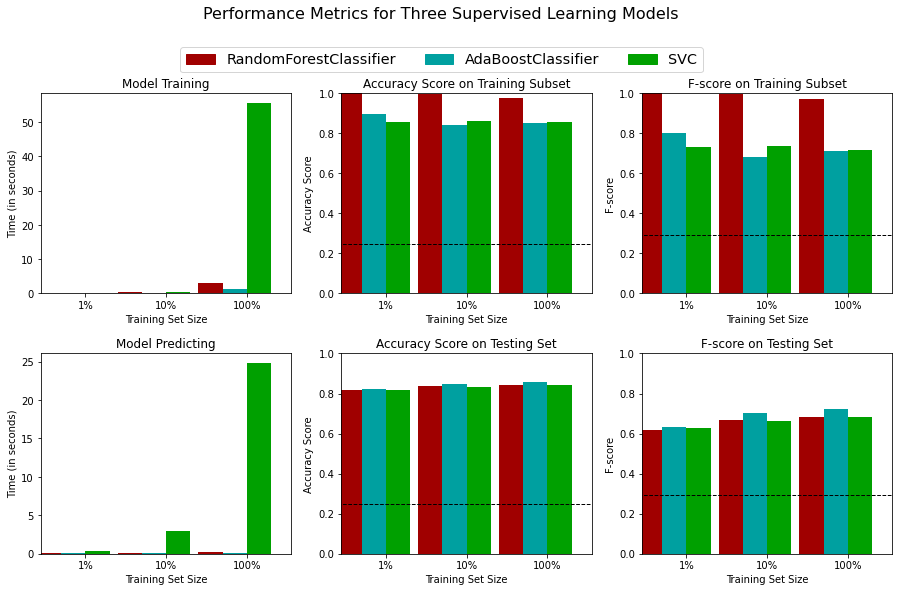

In [14]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [15]:
# Print the most important results in tabular format
for result in results.items():
    print(result[0])
    display(pd.DataFrame(result[1]).rename(columns={2:'score'}).drop(
        [0,1], axis=1).drop(['acc_train', 'f_train'], axis=0))

RandomForestClassifier


,score
train_time,3.124610
pred_time,0.172979
acc_test,0.842344
f_test,0.681346


AdaBoostClassifier


,score
train_time,1.133124
pred_time,0.059213
acc_test,0.857601
f_test,0.724551


SVC


,score
train_time,55.756289
pred_time,24.816234
acc_test,0.842344
f_test,0.685054


* **AdaBoostClassifier** best classifies the data and hence is chosen to be used on the data.

As can be seen from the graphs above, Random Forest significantly outperforms other algorithms on accuracy and the f-score metrics for the training set. However, it is the worst performer when considering the test set as shown in the tabular output, suggesting that the algorithm overfits the data. Overall, all three models have a similar accuracy metric performance on the test set, with AdaBoostClassifier performing slightly better than the other two algorithms. With regards to the f-score, AdaBoostClassifier clearly outperforms the other two algorithms, consistently having a higher score for all sample sizes. Such performance is to be expected from the algorithm as this is a binary classification problem which is where the AdaBoostClassifier performs best. Lastly, it is important to note on top of having the best metric scores, AdaBoostClassifier was also the fastest model having the lowest prediction and training times out of all three algorithms.

<a id='5.2'></a>
###  5.2 Describing AdaBoostClassifier in Layman's Terms
AdaBoost algorithm, short for Adaptive Boosting, is a boosting technique used as an ensemble method in machine learning. Essentially the aim of the technique is to set weights to data points and classifiers in a way that forces classifiers to concentrate on records that are difficult to correctly classify.

AdaBoostClassifier takes the following steps. Firstly, a weak learner is chosen. A weak learner is a classifier that has a better prediction than the naive predictor, for instance, a decision tree. This first weak learner is fit to maximise the accuracy. Then, the objective of the second weak learner is to fix the mistakes of the first one, and hence the misclassified data points are given higher weights to punish the model more for misclassifying those points. The process of increasingly punishing the weak learners for misclassified points of the previous learner is iterated, and the weak learners are then combined to make a final ensemble model. In the final model, each learner votes to predict a person's income being more than 50k or not, and the model takes the majority of the votes to make a final prediction.

<a id='5.3'></a>
### 5.3 Model Tuning
A model's performance can be improved by altering hyperparameters. Grid search (`GridSearchCV`) will be used in order to find the best suited parameters for the AdaBoostClassifier classifier for this dataset. The code cell below finds the best number of estimators and learning rate parameters that would optimize and improve the current model's performance.

In [16]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf = AdaBoostClassifier(random_state = 42)

# Create the parameters to tune
parameters = {
    'n_estimators': [25, 50, 100, 175, 275],
    'learning_rate': [0.01, 0.1, 0.5, 1, 2]
}

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta = 0.5)

# Perform grid search on the classifier
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8659
Final F-score on the testing data: 0.7414


In [17]:
# Extract best classifier parameters
best_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1,
 'n_estimators': 275,
 'random_state': 42}

<a id='5.4'></a>
### 5.4 Final Model Evaluation

#### Results:

|     Metric     |  Naive predictor  | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :---------------: | :-------------: |
| Accuracy Score |      0.2478       |      0.8576       |      0.8659     |    
| F-score        |      0.2917       |      0.7246       |      0.7414     |   


As can be seen from the results table above, the final optimized AdaBoostClassifier significantly outperforms the naive predictor on both accuracy and f-score, as both metrics are more than double for the optimized model. Similarly, there is also an improvement from the unoptimized to optimized model. However, this difference is not as significant. However, the accuracy score improves from 0.8576 to 0.8659, and the f-score improves from 0.7246 to 0.7414. Since it was already proven that the unoptimized model outperforms the other two chosen supervised learning algorithms, it is clear that the optimized AdaBoostClassifier has the best performance for this dataset.

----
<a id='6.'></a>
## 6. Feature Importance

An important task when performing supervised learning on a dataset like the census data studied here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label, it is possible to simplify the understanding of the phenomenon, which is almost always useful. In the case of this project, that means a small number of features should be identified that most strongly predict whether an individual makes at most or more than \$50,000.


Since AdaboostClassifier has `feature_importance_` attribute in scikit-learn, it is possible to rank the importance of features according to this chosen classifier. In this section, the most important features for the census dataset will be identified.

<a id='6.1'></a>
### 6.1 Feature Relevance Observation
In section 2 of this project, it was shown there are thirteen available features for each individual on record in the census data. They are shown below:

In [18]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Of these thirteen records, I believe that the following 5 are the most important in predicting an individual's income based on pure observation::

* *Capital gain* 

Capital gain is clearly related to the amount of income an individual receives. It is likely that a high capital gain coming from investing will lead to higher income and vice versa.


* *Capital loss*

Essentially capital loss and capital gain can be seen as a single variable, but in this particular dataset, they are separate features, and hence I believe that capital loss will similarly affect one's income. However, in this case, there will be an opposite effect (i.e. a higher capital loss will lead to lower income and vice versa).

* *Age*

It could be argued that with age one gains more experience in one's job and hence becomes more skilled and efficient at it. It could be similarly argued that a more skilled and efficient worker is more valuable regardless of the occupation and, therefore, should have a higher income. Hence it is likely that age will affect income.

* *Education level*

Similarly, arguably, a higher level of education makes an individual more skilled and therefore more valuable in the job market. Hence, it is likely that an individual with a higher education level will be paid more than an individual with a lower education level.

* *Occupation*

It is clear that certain occupations pay more than others, and since there are a variety of occupations present in the dataset, it is likely to capture these differences as an individual's occupation is likely to affect that individual's income.

<a id='6.2'></a>
### 6.2 Extracting Most Predictive Features
It is possible to extract most predictive features using `feature_importance_` attribute  which is a function that ranks the importance of each feature when making predictions based on the chosen algorithm. The graph below shows the most important features according to the optimized AdaBoostClassifier for predicting if an individual makes at most or above \$50,000.

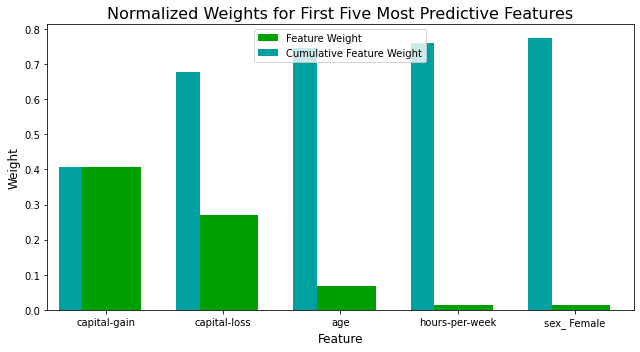

In [19]:
# Import a Optimized AdaBoostClassifier
model = AdaBoostClassifier(learning_rate = 1, n_estimators = 275, random_state = 42)

# Train the model
model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

####  Observations
The visualisation above confirms that the first 3 features that were selected based on simply observing the data are indeed among the top five most predictive features. Moreover, capital gain, capital loss and age are also the top 3 most predictive features as deduced from pure observation and logic. Hence, I believe that these features are indeed the most predictive due to the reasoning outlined above.


Nevertheless, the graph illustrates that education level and occupation are not among the most predictive features. Instead, hours worked per week and sex are more predictive than the previously described features. Hours per week could be an important predictive feature as it is possible that individuals who work more hours earn more money for their efforts and hence have a higher income. Furthermore, the graph shows that sex is an important predictor of an individual's income. The dataset, therefore, illustrates the disparities in pay between different sexes, and this could be explained that by the fact that, unfortunately, there is a pay gap where women, on average, are paid less than men.


Lastly, it is important to note that while the graph shows capital gain, capital loss, age, hours per week and sex as the top predictive features, the predictive importance of hours per week, sex and even age is significantly smaller than that of capital gain and capital loss variables.

<a id='6.3'></a>
### 6.3 Feature Selection
From the visualization above, we see that the top five most important features contribute more than half (around 75%) of the importance of all features present in the data. This hints that it is possible to reduce the feature space and simplify the information required for the model to learn. Therefore, another instance of AdaBoostClassifier will be trained on the same dataset but containing only the five most important predictive features. With fewer features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics.  The code cell below compares the metrics and training and prediction time of the optimized model found earlier using the full features dataset and reduced features dataset.

In [20]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train and make predictions with all features using the "best" model found from grid search earlier
start_full = time() # Get start time
clf_full = (clone(best_clf)).fit(X_train, y_train)
full_predictions = clf_full.predict(X_test)
end_full = time() # Get start time

full_time = end_full - start_full

# Train and make predictions with reduced features using the "best" model found from grid search earlier
start_reduced = time() # Get start time
clf_reduced = (clone(best_clf)).fit(X_train_reduced, y_train)
reduced_predictions = clf_reduced.predict(X_test_reduced)
end_reduced = time() # Get start time

reduced_time = end_reduced - start_reduced

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, full_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, full_predictions, beta = 0.5)))
print("Time taken to train and predict: {}".format(full_time))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))
print("Time taken to train and predict: {}".format(reduced_time))

Final Model trained on full data
------
Accuracy on testing data: 0.8659
F-score on testing data: 0.7414
Time taken to train and predict: 6.461893081665039

Final Model trained on reduced data
------
Accuracy on testing data: 0.8247
F-score on testing data: 0.6597
Time taken to train and predict: 2.2083420753479004


#### Effects of Feature Selection

As can be seen from the output above, the accuracy and the f-score metrics decrease if the optimized AdaBoostClassifier would be trained on the reduced data. For the accuracy score, the decrease is from 0.8659 to 0.8247, and while it is arguably not that significant, the gained time from using reduced data is only around 4 seconds and therefore, it is not worth sacrificing accuracy for a relatively small decrease in training and predicting time. Similarly, and more importantly, there is a much larger decrease in the f-score, which decreases from 0.7414 to 0.6597. This metric is more valuable in the context of this problem, as described in section 4, and since there is a significant decrease in this score, it could be deduced that the optimized model should not be trained on the reduced data.